In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import warnings
warnings.filterwarnings('ignore')

# SATE

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.043 s^2 + 0.02621 s + 164.7
-----------------------------
   s^2 + 0.02621 s + 164.7

<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


3.563 s^2 + 0.01343 s + 12.66
-----------------------------
   s^2 + 0.01343 s + 12.66



Text(0, 0.5, 'yout')

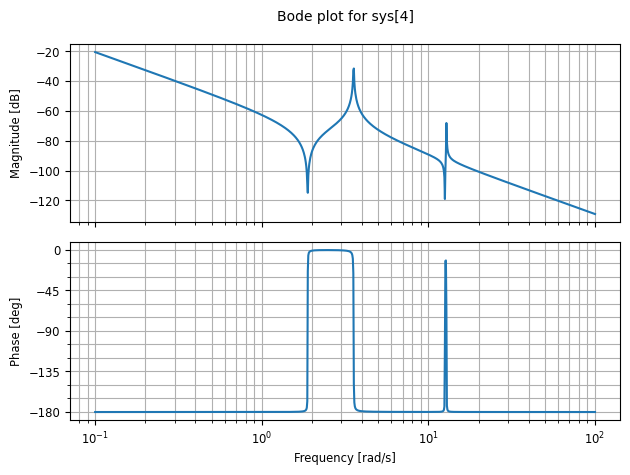

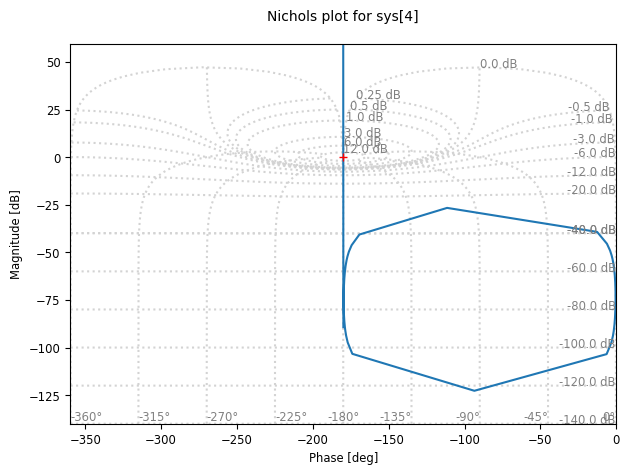

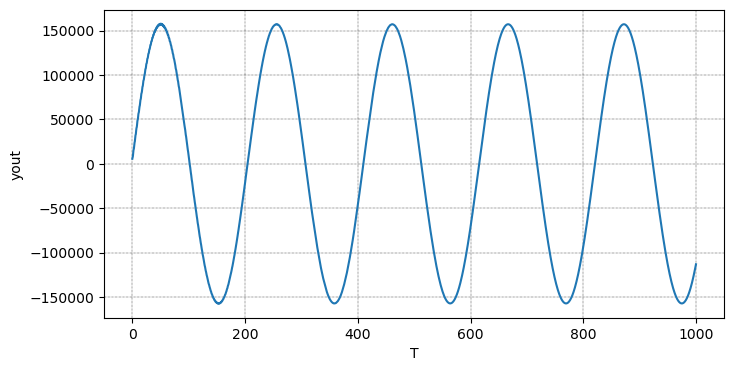

In [2]:
Is = 1069
ns = 1
ds = np.array([Is, 0, 0])

tfS = ct.tf(ns,ds)

# Modo elastico de antena 

I0 = 1025
f1 = 2.0
psi1 = 0.001

w1 = 2*np.pi*f1
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1,   w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])
 
# Modo elastico de los paneles solares
 
I0 =300
f2 = 0.3
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])

tf1 = ct.tf(n1,d1)
tf2 = ct.tf(n2,d2)

print(tf1)
print(tf2)

sys = tf1*tf2*tfS
sysCL = sys/(1+sys)

mag,phase,omega =  ct.bode(sys,plot=True,Hz=False,dB=True,deg=True)

ct.nichols(sys,[0.001,10])

T, yout = ct.step_response(sysCL,1000,1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")

# CONT

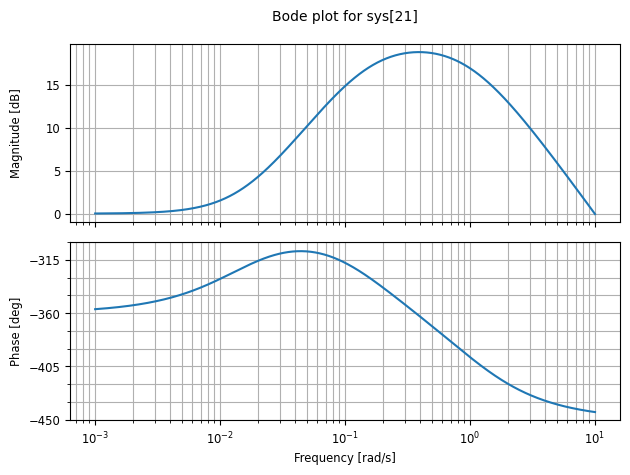

In [4]:
Is = 1069
k = 1
psi = 1.0

Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay, ddelay)


sys = tfC*tfDelay
sysCL = sys/(1+sys)

ct.bode(sys,Hz=False,dB=True,deg=True)

# FILT

In [4]:
from scipy.signal import ellip, butter

(np.float64(1.041276066342287), inf, np.float64(1.4000506631382332), nan)
(inf, inf, nan, nan)
(inf, inf, nan, nan)


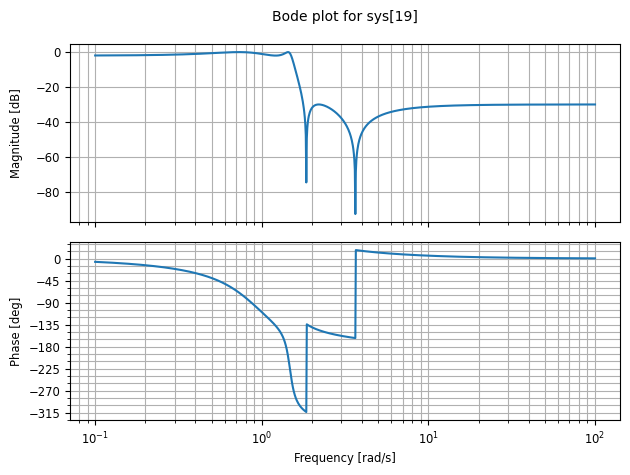

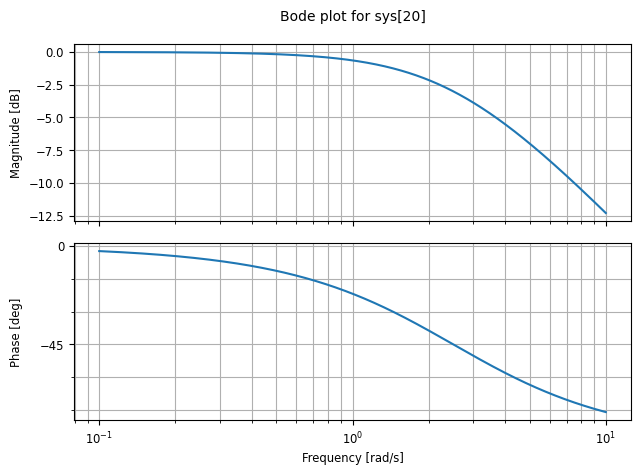

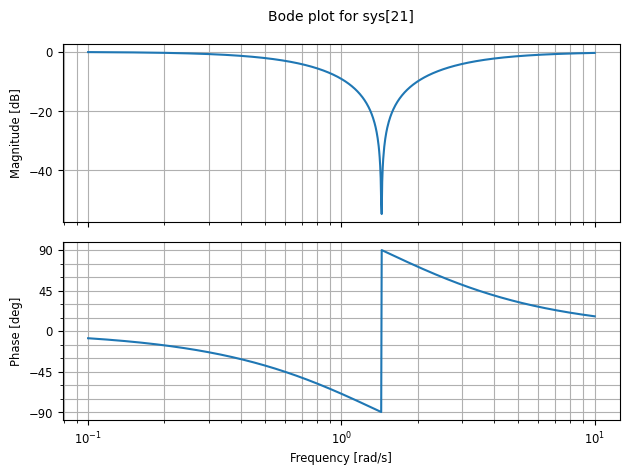

In [5]:
N1,D1 = ellip(4,2.,30,1.5,'low',analog=True)
sys_F1 = ct.tf(N1,D1)

N2,D2 = butter(1,2.5,'low',analog=True)
sys_F2 = ct.tf(N2,D2)

# Filtro NOTCH
wc = 1.44
psiz = 0.
psip = 1.
sys_F3=ct.tf([1, 2*psiz*wc, wc**2],[1, 2*psip*wc, wc**2])

plt.figure()
ct.bode(sys_F1,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F1))
plt.figure()
ct.bode(sys_F2,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F2))
plt.figure()
ct.bode(sys_F3,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F3))

# Todo Junto

Text(0, 0.5, 'yout')

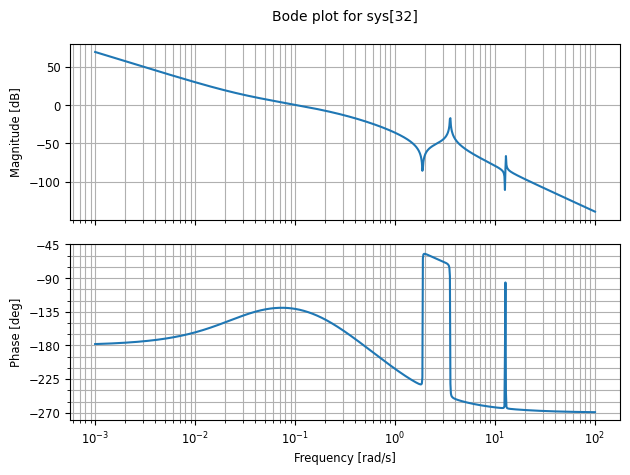

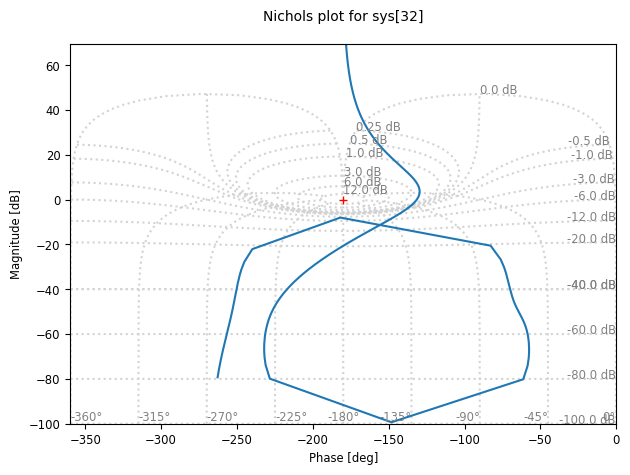

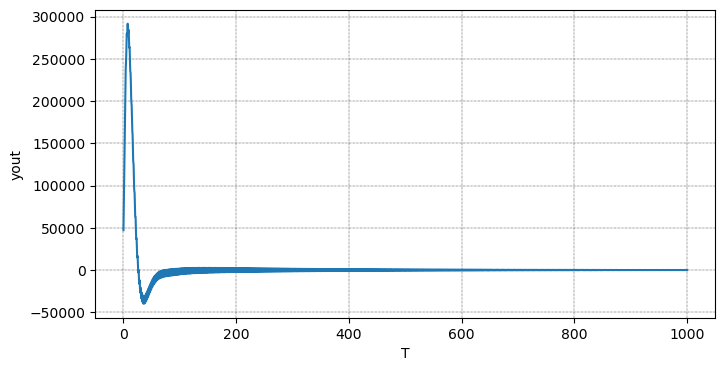

In [ ]:
FLEX = True
FILTRO = False
DELAY = True

# Satelite 

Is = 1069
ns = 1
ds = np.array([Is, 0, 0])

tfS = ct.tf(ns,ds)

sys = tfS

# La proporcion de Inercia aportada por el apendice flexible se regulara con la 
# constante rmi (i=1,2,...)
# rmi = Inercia del Apendice flexible / Inercia total del satelite = Ia/Is
# Por otro lado para calcular la frecuencia modal ( denominador de la funcion de 
# transferencia ) se necesitan Is y I0=Is-Ia
# I0=Is-Ia=Is-rmi*Is=Is*(1-rmi)

# Modo elastico de antena

rm1 = 0.04
I0 = Is*(1-rm1)

f1 = 2.0
psi1 = 0.001
w1 = 2*np.pi*f1
        
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])

tf1 = ct.tf(n1,d1) 

if True:
    sys = sys * tf1
    
# Modo elastico de los paneles solares

rm2 = 0.34          # Variar relacion de inercias rm2 entre (0.1 y 0.5)
I0 = Is*(1-rm2)

f2 = 0.3            # Variar frecuencia de cantilever entre (0.1 y 1.0)
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])

tf2 = ct.tf(n2,d2)

if FLEX:
    sys = sys * tf2

# LEAD-LAG

k = 3.17        # Encontrar la ganancia k más grande que cumpla con los 
                # requerimientos para cada rm2 y f2
psi = 1.
Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)
sys = sys * tfC

# Delay

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay,ddelay)

if DELAY:
    sys = sys*tfDelay

# Filtro

[N1,D1] = ellip(6,2.,10,1.5,'low',analog=True)
sys_F1 = ct.tf(N1,D1)

if FILTRO:
    sys = sys*sys_F1

sysCL=sys/(1+sys)


# Analisis

mag,phase,omega = ct.bode(sys,plot=True,Hz=False,dB=True,deg=True)
ct.nichols(sys,[0.001,10])

T, yout = ct.step_response(sysCL,1000,.1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")